I a [previous post](../embedding-matplotlib-animations-in-jupyter-notebooks), I outlined how to embed a Matplotlib Animation directly in the Jupyter Notebook as a HTML5 video. In this notebook, we take the same Animation and save it as a GIF using Imagemagick. First, let us reproduce the `FuncAnimation` object from the notebook.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML, Image

In [3]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

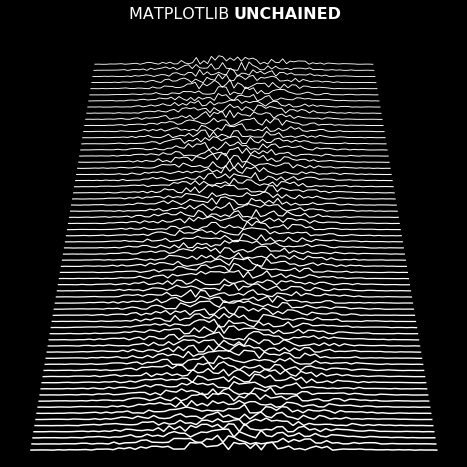

In [4]:
# Create new Figure with black background
fig = plt.figure(figsize=(8, 8), facecolor='black')

# Add a subplot with no frame
ax = fig.add_subplot(111, frameon=False)

# Generate random data
data = np.random.uniform(0, 1, (64, 75))
X = np.linspace(-1, 1, data.shape[-1])
G = 1.5 * np.exp(-4 * X * X)

# Set y limit (or first line is cropped because of thickness)
ax.set_ylim(-1, 70)

# No ticks
ax.set_xticks([])
ax.set_yticks([])

# 2 part titles to get different font weights
ax.text(0.5, 1.0, "MATPLOTLIB ", transform=ax.transAxes,
        ha="right", va="bottom", color="w",
        family="sans-serif", fontweight="light", fontsize=16)
ax.text(0.5, 1.0, "UNCHAINED", transform=ax.transAxes,
        ha="left", va="bottom", color="w",
        family="sans-serif", fontweight="bold", fontsize=16)

# Generate line plots
lines = [ax.plot((1-i/200.)*X, i+G*d , color="w", lw=1.5-i/100.)[0] 
         for i, d in enumerate(data)]

In [5]:
def animate(*args):
    # Shift all data to the right
    data[:, 1:] = data[:, :-1]

    # Fill-in new values
    data[:, 0] = np.random.uniform(0, 1, len(data))

    # Update data
    for i, line in enumerate(lines):
        line.set_ydata(i + G * data[i])

    # Return modified artists
    return lines

In [6]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, interval=20, blit=True)

Now, we just need to [save](http://matplotlib.org/api/animation_api.html#matplotlib.animation.Animation.save) the animation instance with `writer=imagemagick`. But before we do that, we first make sure `imagemagick` has been properly installed on our system.

In [7]:
!brew install imagemagick 

Updating Homebrew...


Now we can go ahead and save it as a GIF.

In [8]:
anim.save('../../files/unchained.gif', writer='imagemagick', fps=60, savefig_kwargs=dict(facecolor='black'))

Let's read it back in and display it to make sure it saved as expected.

In [9]:
Image(url='../../../unchained.gif')